In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA #try this for now

FILE INPUT

Original shape  (538, 35280)
Transformed shape  (538, 64)
Components
[[-7.97653211e-07 -4.44836653e-05 -3.41651253e-04 ...  4.27058885e-03
   4.26033176e-03  4.22741286e-03]
 [-1.73834727e-07 -1.22850103e-05 -2.19443255e-05 ... -2.67789039e-03
  -2.71845427e-03 -2.84846885e-03]
 [ 2.86574122e-07 -8.94796379e-06  2.60789016e-04 ... -1.68838440e-03
  -1.42039181e-03 -1.20764991e-03]
 ...
 [-1.34093054e-06 -1.09039443e-04  9.47604218e-04 ...  6.09860137e-03
   4.70311095e-03  1.16017538e-03]
 [-2.65735039e-06 -6.09941130e-04 -6.21365368e-04 ...  4.51983419e-03
   4.88703358e-04  4.45586278e-03]
 [ 6.41695107e-06 -9.34304698e-04 -6.00992584e-03 ... -1.60653615e-03
  -3.86895700e-03 -1.60951006e-03]]
Explained variance
[1.34731200e+10 9.40919383e+09 6.09270590e+09 4.81857094e+09
 3.96802277e+09 3.43637829e+09 2.55459149e+09 2.12177487e+09
 1.97716108e+09 1.73094539e+09 1.46921650e+09 1.41842040e+09
 1.37571888e+09 1.29838356e+09 1.13137651e+09 1.05606922e+09
 9.89868892e+08 9.56457791e+08 8

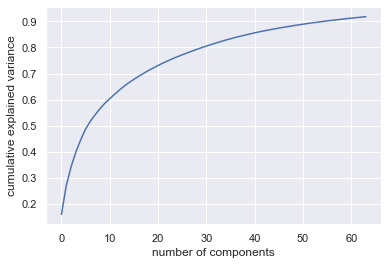

In [2]:
numComponents = 64 #According to the EV Ratio plot, this will get a CEV of ~91%.

#open directory with the raw WAV data CSV in it.
os.chdir('./Training_data/')

WavData = pd.read_csv('000SampleWav.csv', index_col = 0)
#print(WavData.head())
pca = PCA(n_components = numComponents)
pca.fit(WavData)
reduced = pca.fit_transform(WavData)
print('Original shape ', np.shape(WavData))
print('Transformed shape ', np.shape(reduced))
print('Components')
print(pca.components_) #just to see what it came up with.
print('Explained variance')
print(pca.explained_variance_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

<class 'numpy.ndarray'>
[[ 6.56568653e+04 -4.08023370e+04  1.06565865e+04 ... -6.54804282e+03
  -5.59279312e+02 -3.84336182e+03]
 [-7.59404435e+04  2.56383662e+04  5.50860105e+03 ...  2.69216356e+00
   1.87688186e+03  1.29298997e+03]
 [-2.73884712e+04 -1.82046227e+04 -1.53692960e+03 ... -1.47318779e+02
  -6.79449513e+01 -9.96057257e+02]
 ...
 [-5.83556865e+04 -2.52632275e+04 -2.61524491e+04 ...  6.55096608e+03
   1.39708578e+03  3.34552529e+03]
 [-3.04307630e+04 -1.88605407e+04 -1.30005842e+03 ... -1.96430226e+03
  -7.27675210e+02 -2.93459255e+02]
 [-1.21975024e+05 -5.71580031e+04 -3.17126567e+04 ...  1.67207288e+04
  -6.08878046e+03  4.48072194e+02]]


Text(0, 0.5, 'component 2')

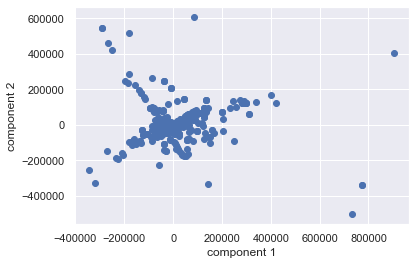

In [4]:
print(type(reduced))
print(reduced)
plt.scatter(reduced[:, 0], reduced[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')

OUTPUT TO CSV FILE

In [6]:
# next, make a NP array of every wav file in the directory
SampleList = np.array(os.listdir())
SampleList = SampleList[ np.char.endswith(SampleList, '.wav') ] #ignore everything that's not a .wav file.

outputData = pd.DataFrame(reduced, index = SampleList)
outputData.to_csv('000PcaReducedWav.csv')